In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Project: Monthly Sales of French Champagne**

The steps of this project that we will work through are as follows:
1. Problem Description.
2. Test Harness.
3. Persistence.
4. Data Analysis.
5. ARIMA Models
6. Model Validation.

This will provide a template for working through a time series prediction problem that you can use on your own dataset.

**Problem Description**

The problem is to predict the number of monthly sales of champagne for the Perrin Freres label (named for a region in France). The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data. The values are a count of millions of sales and there are 105 observations.

**Test Harness**

In [2]:
series = pd.read_csv('monthly_champagne_sales.csv',header=0,index_col=0,parse_dates=True,squeeze=True)
split_point =len(series) -12
dataset, validation = series[0:split_point], series[split_point:]
print(f"Dataset: {len(dataset)}\nValidation: {len(validation)}")
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

Dataset: 93
Validation: 12


In [3]:
dataset # dataset.csv: Observations from 1885 to 1953 (69 observations).

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1971-05-01    5010
1971-06-01    4874
1971-07-01    4633
1971-08-01    1659
1971-09-01    5951
Name: Sales, Length: 93, dtype: int64

In [4]:
dataset.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951], dtype=int64)

In [5]:
validation # validation.csv: Observations from 1954 to 1963 (10 observations).

Month
1971-10-01     6981
1971-11-01     9851
1971-12-01    12670
1972-01-01     4348
1972-02-01     3564
1972-03-01     4577
1972-04-01     4788
1972-05-01     4618
1972-06-01     5312
1972-07-01     4298
1972-08-01     1413
1972-09-01     5877
Name: Sales, dtype: int64

*Model Evaluation*

Refer to chap30

**Persistence**

In [6]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error

# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = []
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions, squared=False)
print(f"RMSE: {rmse}")

Predicted: 5428.0, Expected: 8314.0
Predicted: 8314.0, Expected: 10651.0
Predicted: 10651.0, Expected: 3633.0
Predicted: 3633.0, Expected: 4292.0
Predicted: 4292.0, Expected: 4154.0
Predicted: 4154.0, Expected: 4121.0
Predicted: 4121.0, Expected: 4647.0
Predicted: 4647.0, Expected: 4753.0
Predicted: 4753.0, Expected: 3965.0
Predicted: 3965.0, Expected: 1723.0
Predicted: 1723.0, Expected: 5048.0
Predicted: 5048.0, Expected: 6922.0
Predicted: 6922.0, Expected: 9858.0
Predicted: 9858.0, Expected: 11331.0
Predicted: 11331.0, Expected: 4016.0
Predicted: 4016.0, Expected: 3957.0
Predicted: 3957.0, Expected: 4510.0
Predicted: 4510.0, Expected: 4276.0
Predicted: 4276.0, Expected: 4968.0
Predicted: 4968.0, Expected: 4677.0
Predicted: 4677.0, Expected: 3523.0
Predicted: 3523.0, Expected: 1821.0
Predicted: 1821.0, Expected: 5222.0
Predicted: 5222.0, Expected: 6872.0
Predicted: 6872.0, Expected: 10803.0
Predicted: 10803.0, Expected: 13916.0
Predicted: 13916.0, Expected: 2639.0
Predicted: 2639.0, E

**Data Analysis**

In this section, we will look at the data from four perspectives:
1. Summary Statistics.
2. Line Plot.
3. Density Plots.
4. Box and Whisker Plot.

*Summary Statistics*

In [7]:
# load data
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
# summary statistics
series.describe()

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64

In [9]:
# statistical test for te stationarity of the time series
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Crtitical Values: ")
for key,value in result[4].items():
    print(f"{key}: {np.round(value,4)}")

# Fail to reject null hypothesis --> non-stationary

ADF Statistic: -1.4459704925533412
p-value: 0.5600498382857076
Crtitical Values: 
1%: -3.5138
5%: -2.8979
10%: -2.5862


Some observations from these statistics include:
- The number of observations (count) matches our expectation, meaning we are handling the data correctly.
- The mean is about 4,641, which we might consider our level in this series.
- The standard deviation (average spread from the mean) is relatively large at 2,486 sales.
- The percentiles along with the standard deviation do suggest a large spread to the data.

Text(0, 0.5, 'values')

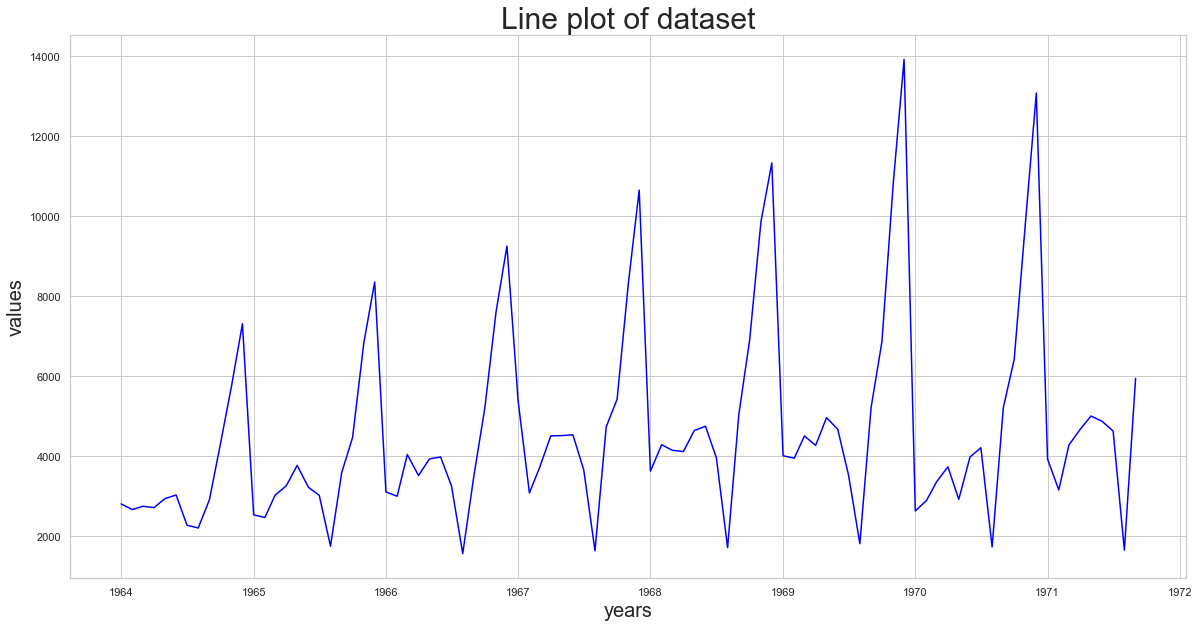

In [11]:
# line plot
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')
sns.lineplot(data=series,ax=ax,color='blue')
ax.set_title(f"Line plot of dataset", fontdict={'fontsize':30})
ax.set_xlabel('years', fontdict={'fontsize':20})
ax.set_ylabel('values', fontdict={'fontsize':20})

Some observations from the plot include:
- There may be an increasing trend of sales over time.
- There appears to be systematic seasonality to the sales for each year.
- The seasonal signal appears to be growing over time, suggesting a multiplicative relationship (increasing change).
- There do not appear to be any obvious outliers.
- The seasonality suggests that the series is almost certainly non-stationary.

There may be benefit in explicitly modeling the seasonal component and removing it. You may also explore using differencing with one or two levels in order to make the series stationary. The increasing trend or growth in the seasonal component may suggest the use of a log or other power transform.

*Seasonal Line Plot*

We can confirm the assumption that the seasonality is a yearly cycle by eyeballing line plots of the dataset by year. The example below takes the 7 full years of data as separate groups and creates one line plot for each.

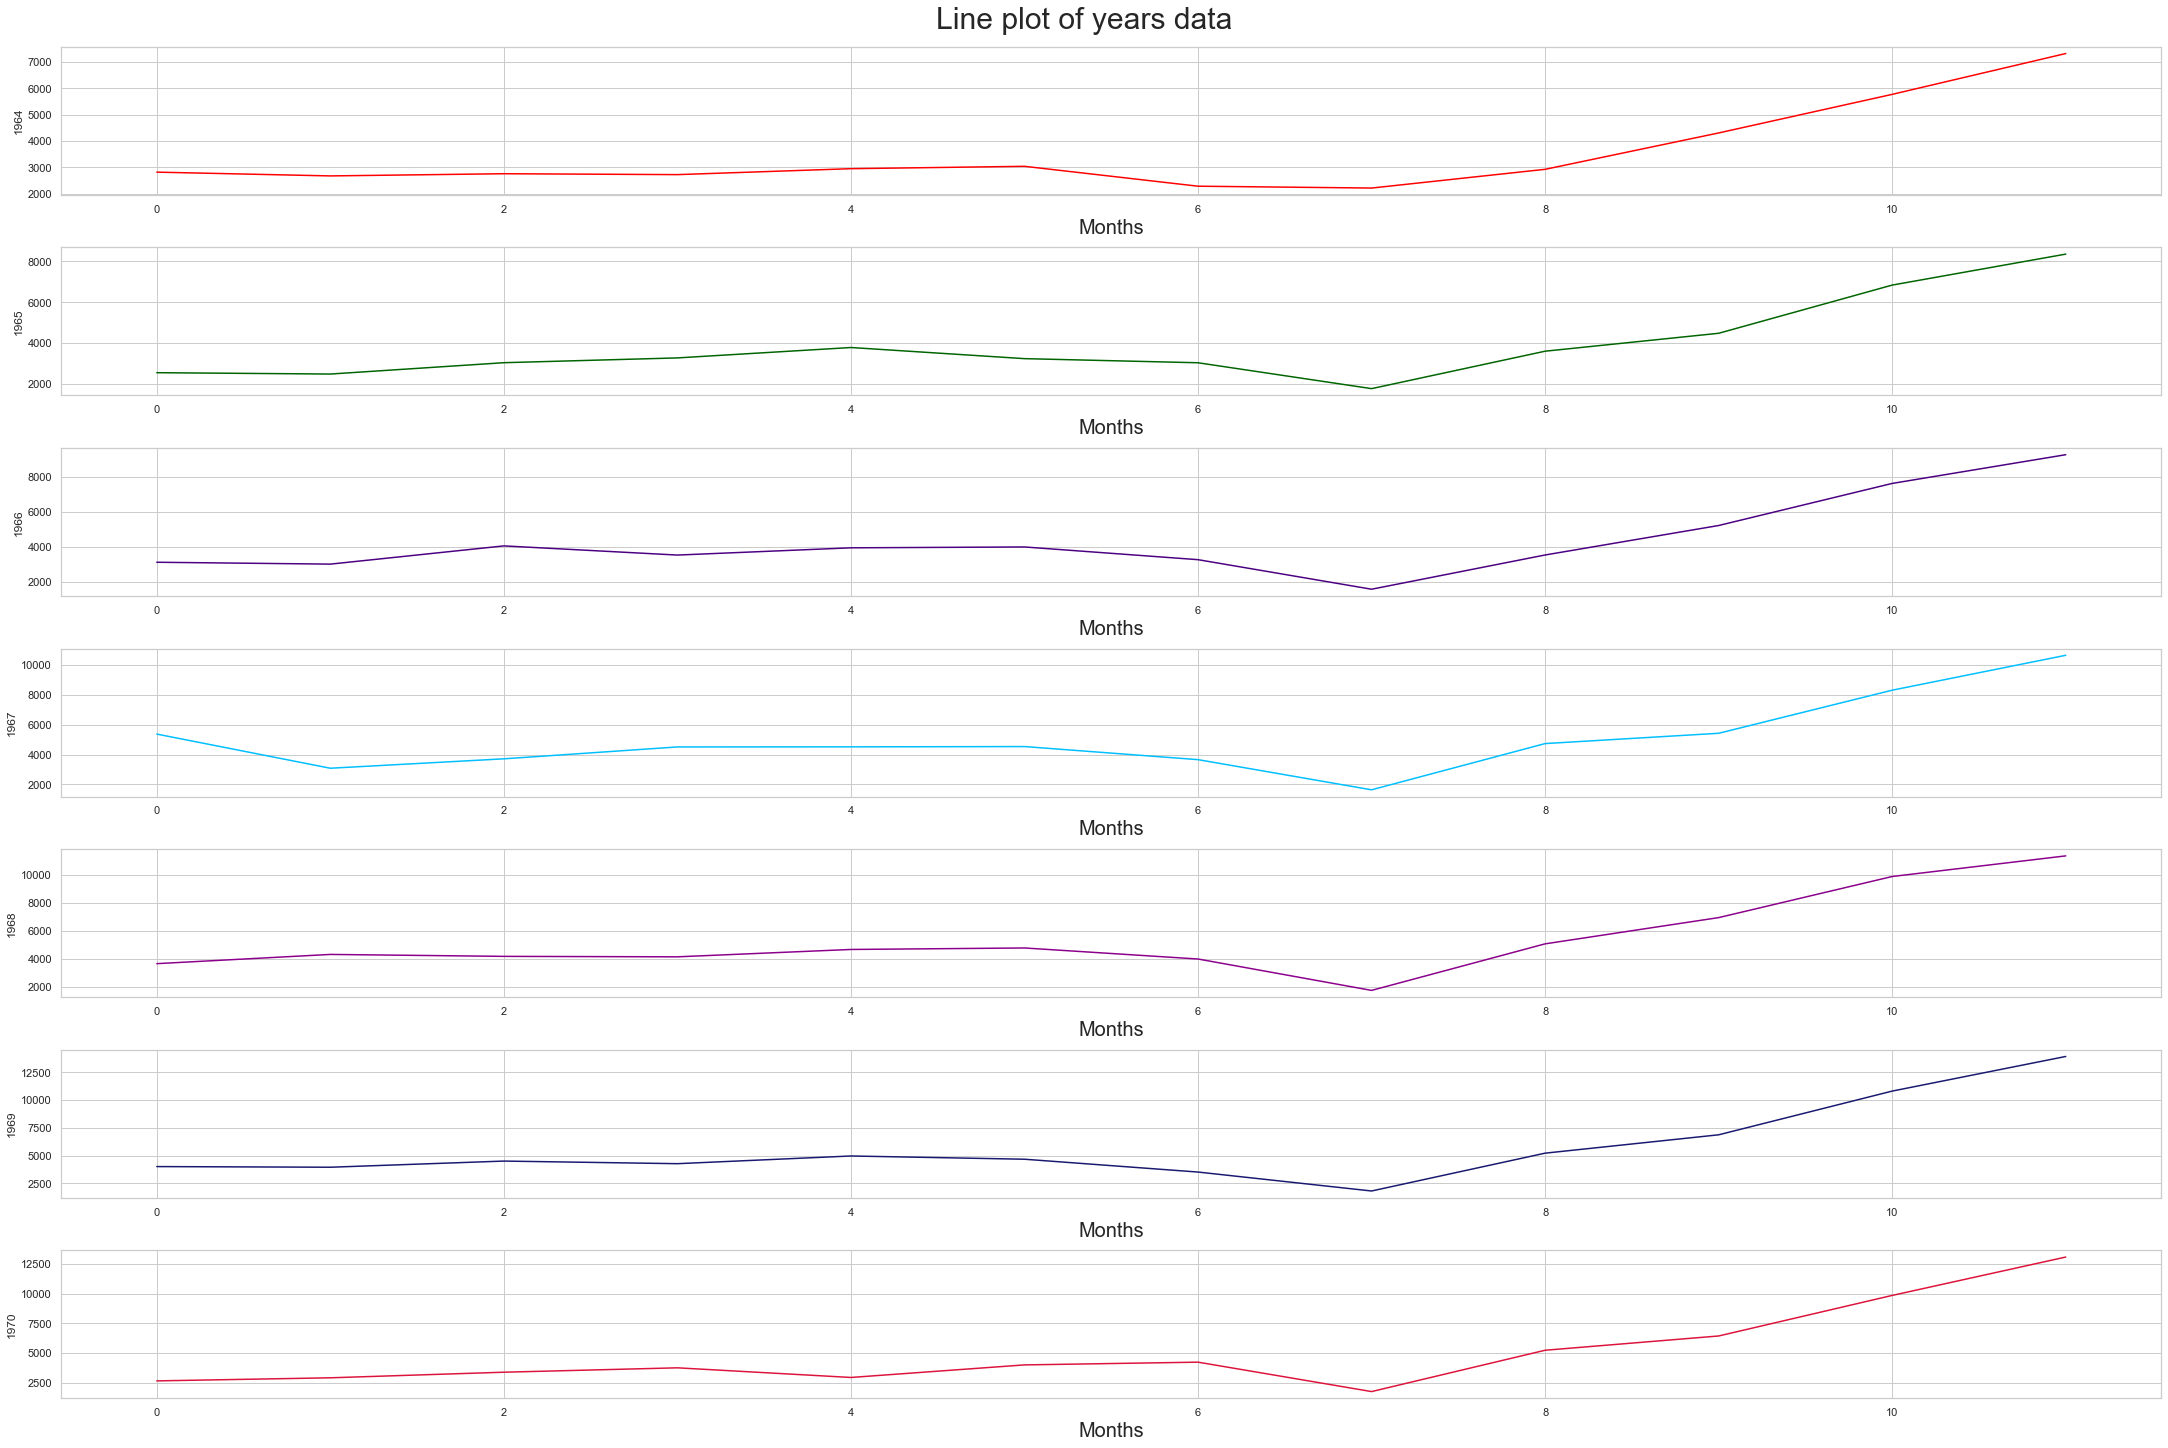

In [40]:
series = pd.read_csv('dataset.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
groups =series['1964':'1970'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
fig, ax = plt.subplots(7,1,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
i = 1
n_groups = len(groups)

for name,group in groups:
    years[name.year] = group.values
years


colors_list = ['red',
                'darkgreen',
                'indigo','deepskyblue','darkmagenta',
                'midnightblue','crimson','chocolate']


for index,value in enumerate(years):
    sns.lineplot(data=years,y=value,x=years.index,ax=ax[index],color=colors_list[index])
    ax[index].set_xlabel("Months", fontdict={'fontsize':20})
    fig.suptitle("Line plot of years data",fontsize=30)

Text(0.5, 0, '')

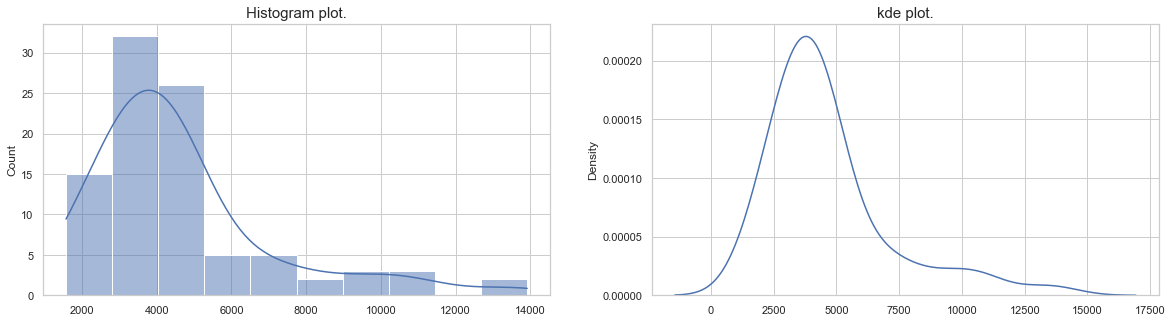

In [41]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=series,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=series, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Some observations from the plots include:
- The distribution is not Gaussian.
- The shape has a long right tail and may suggest an exponential distribution

Text(0.5, 1.0, 'Box plot.')

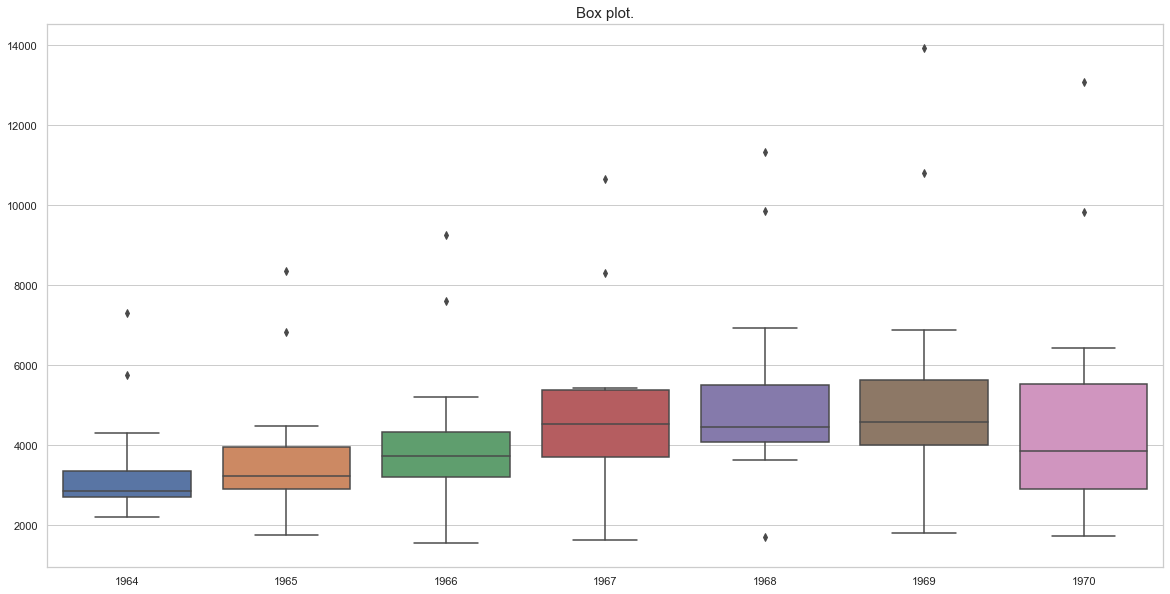

In [42]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_theme(style='whitegrid')

sns.boxplot(data=years,ax=ax)
ax.set_title("Box plot.", fontdict={'fontsize':15})

Some observations from reviewing the plot include:

The observations suggest perhaps some growth trend over the years and outliers that may be a part of the seasonal cycle.

This yearly view of the data is an interesting avenue and could be pursued further by looking at summary statistics from decade-to-decade and changes in summary statistics.

In [43]:
years.describe()

,1964,1965,1966,1967,1968,1969,1970
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3478.166667,3864.166667,4337.666667,5016.000000,5370.583333,5713.416667,5006.583333
std,1555.294759,1900.883758,2119.889119,2380.616001,2723.367082,3382.162795,3324.223996
min,2212.000000,1759.000000,1573.000000,1643.000000,1723.000000,1821.000000,1738.000000
25%,2708.750000,2906.250000,3223.250000,3704.250000,4082.000000,4001.250000,2920.000000
50%,2868.500000,3248.000000,3732.500000,4529.500000,4469.500000,4593.500000,3863.000000
75%,3352.250000,3950.500000,4338.000000,5388.250000,5516.500000,5634.500000,5521.750000
max,7312.000000,8357.000000,9254.000000,10651.000000,11331.000000,13916.000000,13076.000000


**ARIMA Models**

As such, this section is broken down into 3 steps:
1. Manually Configure the ARIMA.
2. Automatically Configure the ARIMA.
3. Review Residual Errors.

In [44]:
dataset

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1971-05-01    5010
1971-06-01    4874
1971-07-01    4633
1971-08-01    1659
1971-09-01    5951
Name: Sales, Length: 93, dtype: int64

*Manually Configured ARIMA*

In [52]:
# statistical test for te stationarity of the time series
from statsmodels.tsa.stattools import adfuller

# create a differenced time series 
def difference(dataset, interval=1):
    diff = []
    for i in range(interval,len(dataset)):
        value = dataset[i] - dataset[i-interval]
        # It begins at index 12 which is january of the new year, so i-interval = 0, index 0 of the previous year--> january
        diff.append(value)
    return pd.Series(diff)


series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# difference data
months_in_year = 12
stationary = difference(X,months_in_year)
# print(stationary)
stationary.index = series.index[months_in_year:]
# print(stationary)

# check if stationary
result = adfuller(stationary)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Crtitical Values: ")
for key,value in result[4].items():
    print(f"{key}: {np.round(value,4)}")

# save
stationary.to_csv('stationary.csv', header=False)

ADF Statistic: -7.134898152961878
p-value: 3.441293677009898e-10
Crtitical Values: 
1%: -3.5149
5%: -2.8984
10%: -2.5864


For reference, the seasonal difference operation can be inverted by adding the observation
for the same month the year before. This is needed in the case that predictions are made by a
model fit on seasonally differenced data. The function to invert the seasonal difference operation
is listed below for completeness.
```
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
```

<AxesSubplot:xlabel='0'>

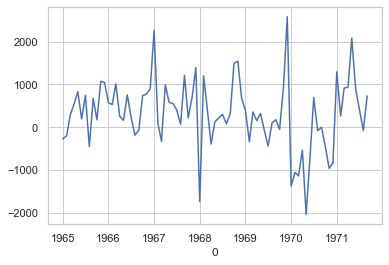

In [54]:
sns.lineplot(data=stationary)

A plot of the differenced dataset is also created. The plot does not show any obvious seasonality or trend, suggesting the seasonally differenced dataset is a good starting point for modeling. We will use this dataset as an input to the ARIMA model. It also suggests that no further differencing may be required, and that the d parameter may be set to 0.

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. Note, we are now using the seasonally differenced stationary.csv as our dataset. This is because the manual seasonal differencing performed is different from the lag=1 differencing performed by the ARIMA model with the d parameter. The example below creates ACF and PACF plots for the series.

Text(0.5, 1.0, 'Partial Autocorrelation plot')

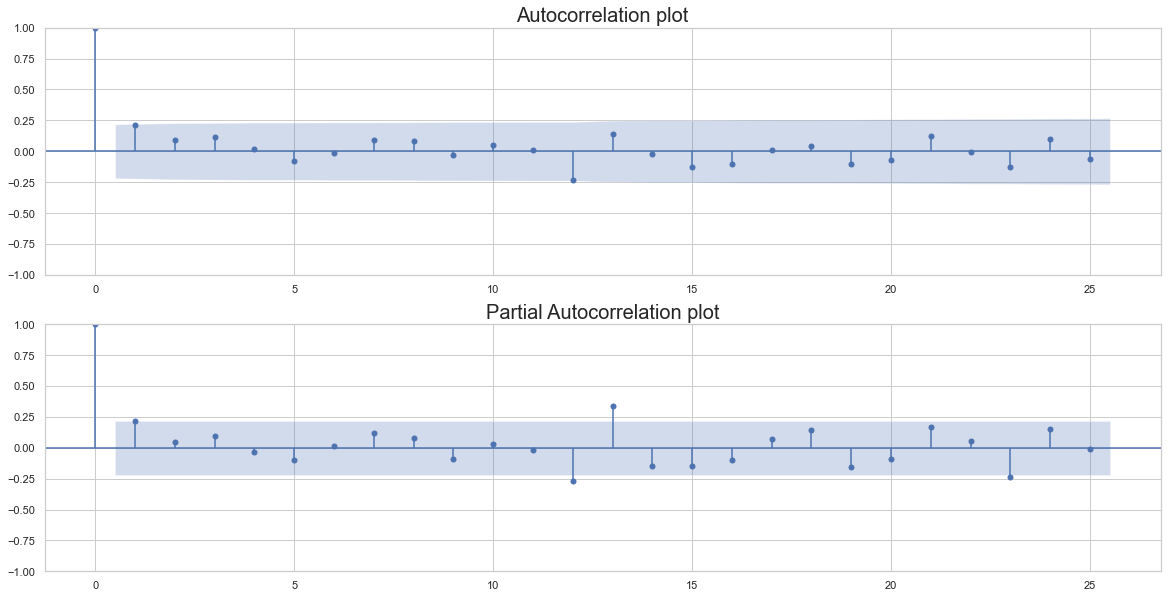

In [57]:
# ACF and PACF plots of time series
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(stationary,lags=25,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(stationary,lags=25,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

Below are some observations from the plots.
- The ACF shows a significant lag for 1 month.
- The PACF shows a significant lag for 1 month, with perhaps some significant lag at 12
and 13 months.
- Both the ACF and PACF show a drop-off at the same point, perhaps suggesting a mix of AR and MA.

A good starting point for the p and q values is also 1. The PACF plot also suggests that
there is still some seasonality present in the differenced data. We may consider a better model
of seasonality, such as modeling it directly and explicitly removing it from the model rather
than seasonal differencing.

p = 1, q = 1 or 2

This quick analysis suggests an ARIMA(1,0,1) on the stationary data may be a good starting point. The historic observations will be seasonally differenced prior to the fitting of each ARIMA model. The differencing will be inverted for all predictions made to make them directly comparable to the expected observation in the original sale count units. Experimentation shows that this configuration of ARIMA does not converge and results in errors by the underlying library. Further experimentation showed that adding one level of differencing to the stationary data made the model more stable. The model can be extended to ARIMA(1,1,1).

We will also disable the automatic addition of a trend constant from the model by setting the trend argument to nc for no constant in the call to fit().

In [71]:
# Establishing a baseline using ARIMA(4,1,1)
from statsmodels.tsa.arima.model import ARIMA

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1),trend='n') # To not add a trend
    # model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 8076.98743183336, Expected: 8314.0
Predicted: 9747.153505952494, Expected: 10651.0
Predicted: 5994.36199088962, Expected: 3633.0
Predicted: 3820.2865914564127, Expected: 4292.0
Predicted: 4041.967765004002, Expected: 4154.0
Predicted: 4990.405085108369, Expected: 4121.0
Predicted: 5129.640654206179, Expected: 4647.0
Predicted: 5031.195722087773, Expected: 4753.0
Predicted: 4133.285471540531, Expected: 3965.0
Predicted: 2095.320951272335, Expected: 1723.0
Predicted: 5216.27065248677, Expected: 5048.0
Predicted: 5866.316772095462, Expected: 6922.0
Predicted: 8591.060174852213, Expected: 9858.0
Predicted: 11028.648698621666, Expected: 11331.0
Predicted: 4090.352245658236, Expected: 4016.0
Predicted: 4767.108922609935, Expected: 3957.0
Predicted: 4656.326024158518, Expected: 4510.0
Predicted: 4577.708473395872, Expected: 4276.0
Predicted: 5108.656378254451, Expected: 4968.0
Predicted: 5202.830640431686, Expected: 4677.0
Predicted: 4423.982118878544, Expected: 3523.0
Predicted: 2

*Grid Search ARIMA Hyperparameters*

In [72]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


# evaluate ARIMA model for given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = []
    for t in range(len(test)):
        # differenced data 
        months_in_year = 12
        diff = difference(history,months_in_year)
        model = ARIMA(history, order=(arima_order),trend='n')  # To not add a trend 
        # model = ARIMA(history, order=(arima_order)) 
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history,yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = mean_squared_error(test,predictions,squared=False)
    return rmse


# evaluate combinations of p,q,d values for a ARIMA model
def evaluate_models(dataset,p_values,d_values, q_values):
    dataset =dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset,order)
                    if rmse< best_score:
                        best_score, best_cfg = rmse,order
                    print(f"ARIMA: {order}, RMSE: {rmse}")
                except:
                    continue
    print(f"Best ARIMA: {best_cfg}, RMSE: {best_score}")

# load dataset
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0,7)
d_values = range(0,3)
q_values = range(0,7)
warnings.filterwarnings("ignore")

In [73]:
evaluate_models(dataset,p_values,d_values, q_values) # persistance RMSE: 3186.50146484375

ARIMA: (0, 0, 0), RMSE: 4324.609821254754
ARIMA: (0, 0, 1), RMSE: 4932.655237613593
ARIMA: (0, 0, 2), RMSE: 4955.1239347724095
ARIMA: (0, 0, 3), RMSE: 5369.631157435937
ARIMA: (0, 0, 4), RMSE: 5120.344264412884
ARIMA: (0, 0, 5), RMSE: 4940.487738034452
ARIMA: (0, 0, 6), RMSE: 5250.440782508442
ARIMA: (0, 1, 0), RMSE: 5907.775903642552
ARIMA: (0, 1, 1), RMSE: 5996.2346891675015
ARIMA: (0, 1, 2), RMSE: 5336.377829673599
ARIMA: (0, 1, 3), RMSE: 5386.54559893181
ARIMA: (0, 1, 4), RMSE: 5616.372060778468
ARIMA: (0, 1, 5), RMSE: 5541.607454610496
ARIMA: (0, 1, 6), RMSE: 5637.120274068489
ARIMA: (0, 2, 0), RMSE: 7295.468450681808
ARIMA: (0, 2, 1), RMSE: 5991.299120952934
ARIMA: (0, 2, 2), RMSE: 6089.608207356123
ARIMA: (0, 2, 3), RMSE: 5600.204018552624
ARIMA: (0, 2, 4), RMSE: 5702.833382878217
ARIMA: (0, 2, 5), RMSE: 5904.518856807156
ARIMA: (0, 2, 6), RMSE: 6031.6055847592725
ARIMA: (1, 0, 0), RMSE: 5117.02800947024
ARIMA: (1, 0, 1), RMSE: 5062.920745516614
ARIMA: (1, 0, 2), RMSE: 4968.1517

Best configuration is (0,0,0) but we shall make use the configuration in the book (0,0,1)

*Review Residual Errors*

In [80]:
from statsmodels.tsa.arima.model import ARIMA

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1),trend='n') # To not add a trend
    # model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Predicted: 7533.506180261281, Expected: 8314.0
Predicted: 9513.496608013567, Expected: 10651.0
Predicted: 5797.244810098368, Expected: 3633.0
Predicted: 2462.555788199771, Expected: 4292.0
Predicted: 3922.852032452119, Expected: 4154.0
Predicted: 4545.659750952786, Expected: 4121.0
Predicted: 4455.109652160053, Expected: 4647.0
Predicted: 4567.681821958398, Expected: 4753.0
Predicted: 3691.088893711076, Expected: 3965.0
Predicted: 1684.9544090578815, Expected: 1723.0
Predicted: 4744.8314089016585, Expected: 5048.0
Predicted: 5474.598372325672, Expected: 6922.0
Predicted: 8556.377650503822, Expected: 9858.0
Predicted: 10925.31702787015, Expected: 11331.0
Predicted: 3726.031920038236, Expected: 4016.0
Predicted: 4360.616296434559, Expected: 3957.0
Predicted: 4059.7201232820003, Expected: 4510.0
Predicted: 4223.037972801561, Expected: 4276.0
Predicted: 4659.008492174147, Expected: 4968.0
Predicted: 4823.541633430399, Expected: 4677.0
Predicted: 3931.8251037232894, Expected: 3523.0
Predict

,0
count,47.000000
mean,165.889608
std,934.712850
min,-2164.244810
25%,-289.774838
50%,191.757925
75%,732.990423
max,2367.310321


Running the example first describes the distribution of the residuals. We can see that the
distribution has a right shift and that the mean is non-zero at 165.889608. RMSE: 939.477708365338

Text(0.5, 0, '')

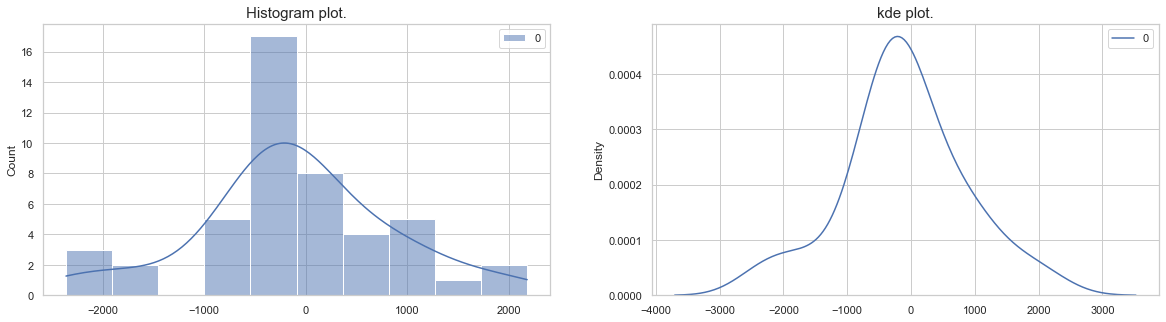

In [77]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=residuals,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=residuals, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Text(0.5, 1.0, 'Partial Autocorrelation plot')

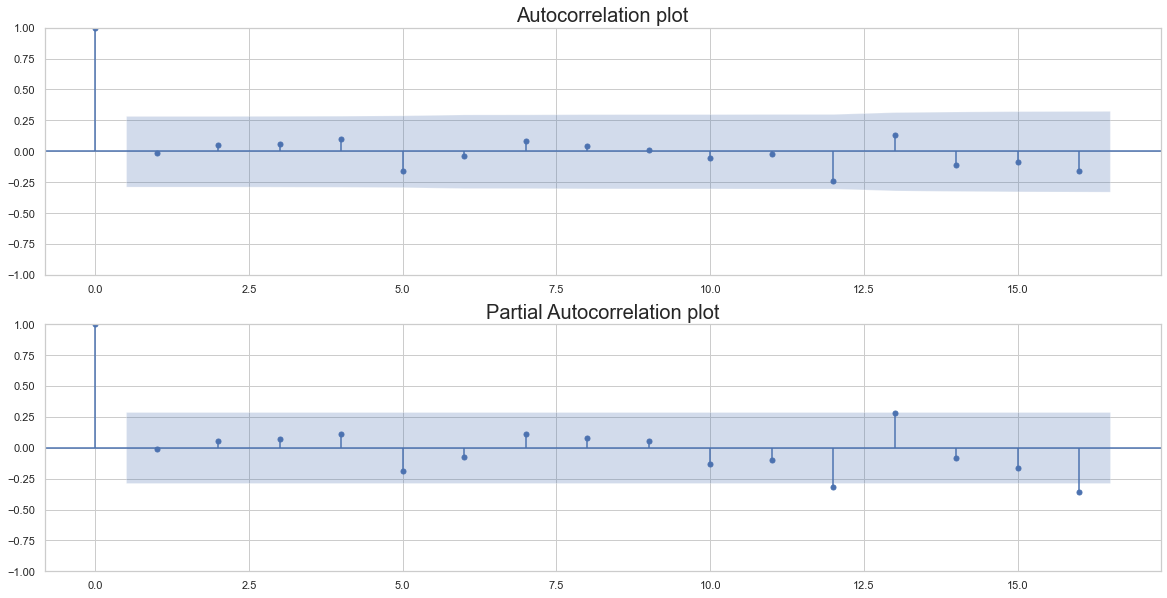

In [81]:
# Checking for correlation in the residuals to see if the model can be further improved

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(residuals,lags=16,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(residuals,lags=16,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

In [82]:
from statsmodels.tsa.arima.model import ARIMA

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 165.889608
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1),trend='n') # To not add a trend
    # model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print(f"Predicted: {yhat}, Expected: {obs}")
# report performance
rmse = mean_squared_error(test,predictions,squared=False)
print(f"RMSE: {rmse}")

# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
residuals.describe()

Predicted: 7699.395788261281, Expected: 8314.0
Predicted: 9679.386216013567, Expected: 10651.0
Predicted: 5963.134418098369, Expected: 3633.0
Predicted: 2628.445396199771, Expected: 4292.0
Predicted: 4088.741640452119, Expected: 4154.0
Predicted: 4711.549358952787, Expected: 4121.0
Predicted: 4620.999260160053, Expected: 4647.0
Predicted: 4733.571429958399, Expected: 4753.0
Predicted: 3856.9785017110758, Expected: 3965.0
Predicted: 1850.8440170578815, Expected: 1723.0
Predicted: 4910.721016901659, Expected: 5048.0
Predicted: 5640.487980325673, Expected: 6922.0
Predicted: 8722.267258503822, Expected: 9858.0
Predicted: 11091.206635870149, Expected: 11331.0
Predicted: 3891.921528038236, Expected: 4016.0
Predicted: 4526.50590443456, Expected: 3957.0
Predicted: 4225.609731282, Expected: 4510.0
Predicted: 4388.927580801562, Expected: 4276.0
Predicted: 4824.898100174148, Expected: 4968.0
Predicted: 4989.4312414303995, Expected: 4677.0
Predicted: 4097.71471172329, Expected: 3523.0
Predicted: 1

,0
count,4.700000e+01
mean,4.113670e-07
std,9.347128e+02
min,-2.330134e+03
25%,-4.556644e+02
50%,2.586832e+01
75%,5.671008e+02
max,2.201421e+03


From RMSE: 939.477708365338 to RMSE: 924.7156332281352, slightly better

Text(0.5, 0, '')

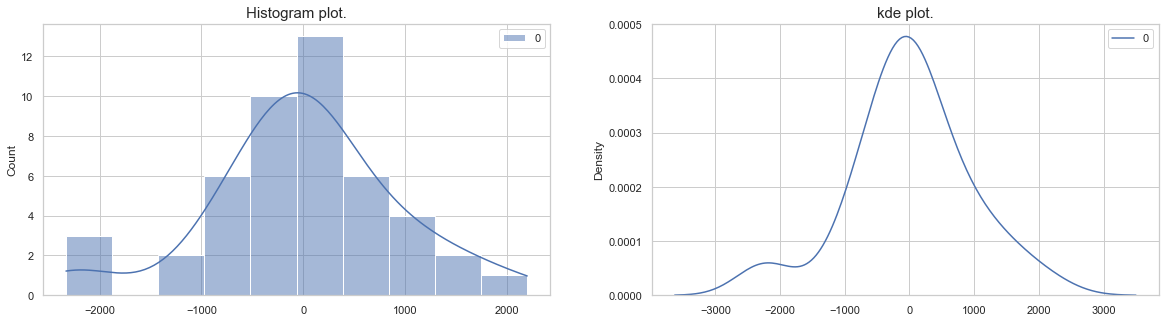

In [85]:
# density plot

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.histplot(data=residuals,bins=10,kde=True, ax=ax[0])
ax[0].set_title("Histogram plot.", fontdict={'fontsize':15})
ax[0].set_xlabel('')

# kde density plot
sns.kdeplot(data=residuals, ax=ax[1])
ax[1].set_title("kde plot.", fontdict={'fontsize':15})
ax[1].set_xlabel('')

Text(0.5, 1.0, 'Partial Autocorrelation plot')

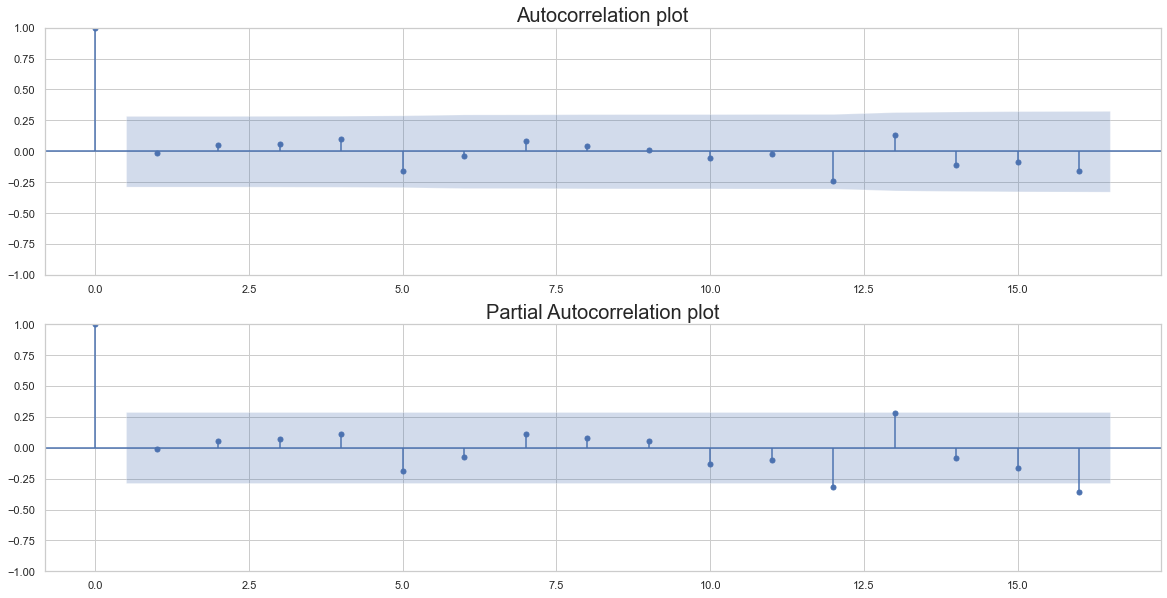

In [86]:
# Checking for correlation in the residuals to see if the model can be further improved

fig, ax = plt.subplots(2,1,figsize=(20,10))
sns.set_theme(style="whitegrid")

plot_acf(residuals,lags=16,ax=ax[0])
ax[0].set_title(f"Autocorrelation plot",fontdict={"fontsize":20})

plot_pacf(residuals,lags=16,ax=ax[1])
ax[1].set_title(f"Partial Autocorrelation plot", fontdict={"fontsize":20})

**Model Validation**

*Finalize Model*

In [88]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')

# differenced data
months_in_year = 12
diff = difference(X,months_in_year)
bias = 165.889608

# fit model
model = ARIMA(diff, order=(0,0,1),trend='n')
model_fit = model.fit()
# save model 
model_fit.save('model.pkl')
np.save('model_bias.npy',[bias])

*Make Prediction*

In [89]:
from statsmodels.tsa.arima.model import ARIMAResults

series = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

months_in_year = 12
bias = 165.889608

model_fit = ARIMAResults.load("model.pkl")
bias = np.load("model_bias.npy")
yhat = float(model_fit.forecast()[0])
yhat = bias+ inverse_difference(series.values,yhat,months_in_year)
print(f"Predicted: {yhat}")

Predicted: [6794.58973178]


*Validate Model*

In [92]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load and prepare datasets
dataset = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]

months_in_year = 12
validation = pd.read_csv('validation.csv', header=None, index_col=0, parse_dates=True,
squeeze=True)
y = validation.values.astype('float32')

# load model 
model_fit = ARIMAResults.load("model.pkl")
bias = np.load("model_bias.npy")
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias+ inverse_difference(history,yhat,months_in_year)
predictions.append(yhat)
history.append(y[0])
print(f"Predicted: {yhat[0]}, Expected: {y[0]}")
# rolling forecasts
for i in range(1, len(y)):
    # differenced data
    months_in_year = 12
    diff = difference(history,months_in_year)
    # predict
    model = ARIMA(diff, order=(0,0,1), trend='n')
    model_fit = model.fit()
    yhat = float(model_fit.forecast()[0])
    yhat = bias+ inverse_difference(history,yhat,months_in_year)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print(f"Predicted: {yhat[0]}, Expected: {obs}")
# report perfomace
rmse = mean_squared_error(y, predictions,squared=False)
print(f"RMSE: {rmse}")

Predicted: 6794.589731783649, Expected: 6981.0
Predicted: 10101.723837968482, Expected: 9851.0
Predicted: 13219.07514046596, Expected: 12670.0
Predicted: 3996.586004310689, Expected: 4348.0
Predicted: 3465.807001841255, Expected: 3564.0
Predicted: 4522.650671326663, Expected: 4577.0
Predicted: 4901.287107291409, Expected: 4788.0
Predicted: 5190.078435633313, Expected: 4618.0
Predicted: 4930.177266428311, Expected: 5312.0
Predicted: 4944.765525298596, Expected: 4298.0
Predicted: 1699.3958197431493, Expected: 1413.0
Predicted: 6085.3088048888085, Expected: 5877.0
RMSE: 361.1093238461425


In [93]:
predictions

[array([6794.58973178]),
 array([10101.72383797]),
 array([13219.07514047]),
 array([3996.58600431]),
 array([3465.80700184]),
 array([4522.65067133]),
 array([4901.28710729]),
 array([5190.07843563]),
 array([4930.17726643]),
 array([4944.7655253]),
 array([1699.39581974]),
 array([6085.30880489])]

In [94]:
len(predictions)

12

In [ ]:
# predictions_2 = predictions.copy()
# pred_pop = predictions_2.pop(0)
# pred_pop[0]

In [96]:
# fixing predictions list problem
predictions_fix = []
for i in range(len(predictions)):
    pred_pop = predictions.pop(0)
    predictions_fix.append(pred_pop[0])

# fixed
print(predictions_fix)

[6794.589731783649, 10101.723837968482, 13219.07514046596, 3996.586004310689, 3465.807001841255, 4522.650671326663, 4901.287107291409, 5190.078435633313, 4930.177266428311, 4944.765525298596, 1699.3958197431493, 6085.3088048888085]


Text(0.5, 1.0, 'Line plot.')

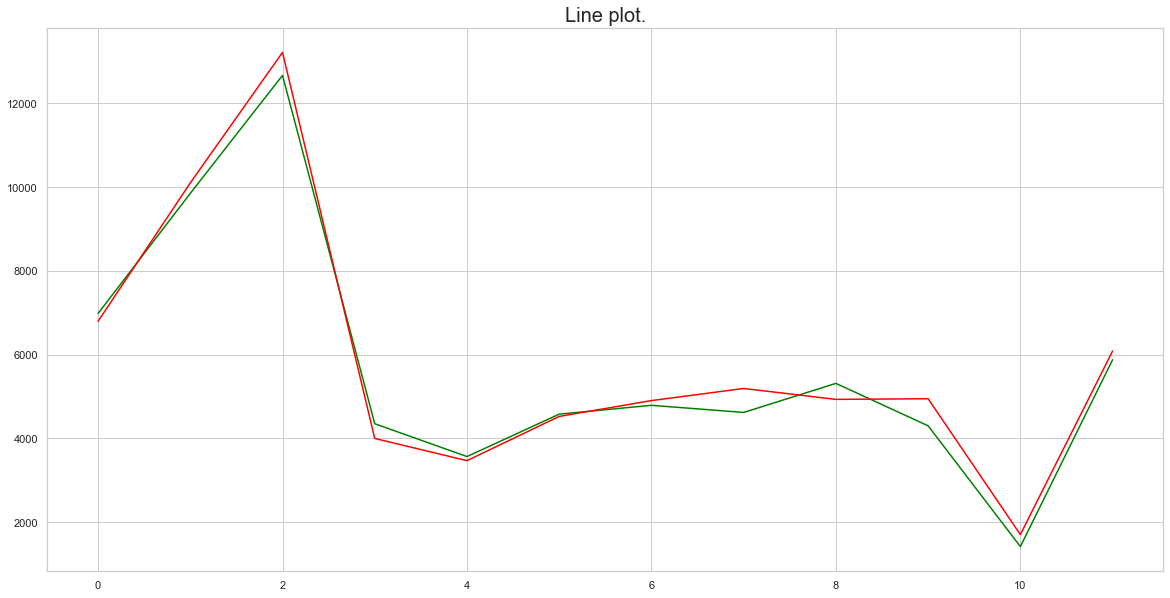

In [97]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.set_theme(style='whitegrid')

# histogram density plot
sns.lineplot(data=y, ax=ax, color='green')
sns.lineplot(data=predictions_fix,ax=ax, color='red')
ax.set_title("Line plot.", fontdict={'fontsize':20})


A plot of the predictions compared to the validation dataset is also provided. At this scale on the plot, the 12 months of forecast sales figures look fantastic.